NAMA   : MUHAMMAD FAIZAL ALKINDI

NIM    : 5312422002

In [3]:
# Impor modul yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

# Pengaturan ukuran font
FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

# Mengaktifkan plot di dalam notebook
%matplotlib inline

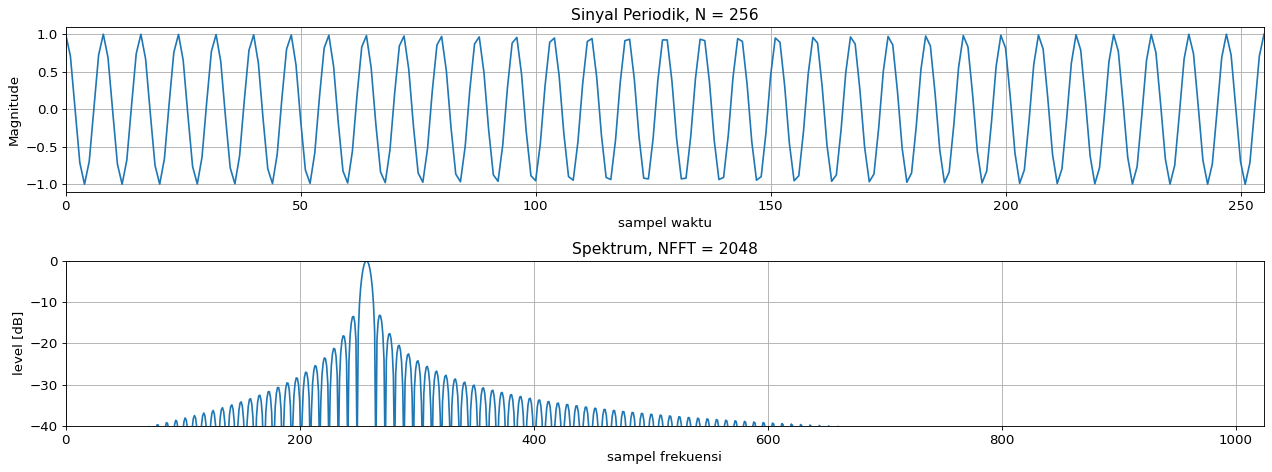

In [4]:
# Parameter-input
N = 256
NFFT = 2048

# Sinyal masukan (panjang: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Menghitung FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Membuat plot
plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.title('Sinyal Periodik, N = {}'.format(N))
plt.xlabel('sampel waktu')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spektrum, NFFT = {}'.format(NFFT))
plt.xlabel('sampel frekuensi')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()

Gambar diatas memperlihatkan dua grafik yang berkaitan dengan analisis sinyal.

1. **Grafik Pertama (atas)**: Grafik ini menunjukkan sinyal periodik dengan judul "Sinyal Periodik, N = 256". Dalam grafik ini, sumbu horizontal (x-axis) merepresentasikan "sample value" atau nilai sampel yang dibagi dalam 256 poin (dari 0 hingga sekitar 250), sementara sumbu vertikal (y-axis) merepresentasikan amplitudo dari sinyal. Bentuk gelombang ini menunjukkan karakteristik sinyal periodik yang berulang setiap interval tetap, dan ini bisa dari jenis sinyal sinusoidal atau kosinusoidal.

2. **Grafik Kedua (bawah)**: Grafik ini menunjukkan hasil transformasi Fourier dari sinyal di grafik pertama, yang disebut sebagai "Spektrum, mFFT = 2048". Dalam analisis spektral, amplitude diplot terhadap frekuensi sampel (sampel frekuensi pada sumbu x dan level dB pada sumbu y). Analisis ini digunakan untuk menentukan komponen frekuensi yang ada dalam sinyal asli. Puncak spektrum menunjukkan frekuensi dominan dalam sinyal. Transformasi Fourier digunakan untuk mengidentifikasi komponen frekuensi dalam sinyal waktu-nyata dan sering digunakan dalam analisis sinyal di bidang teknik dan fisika.

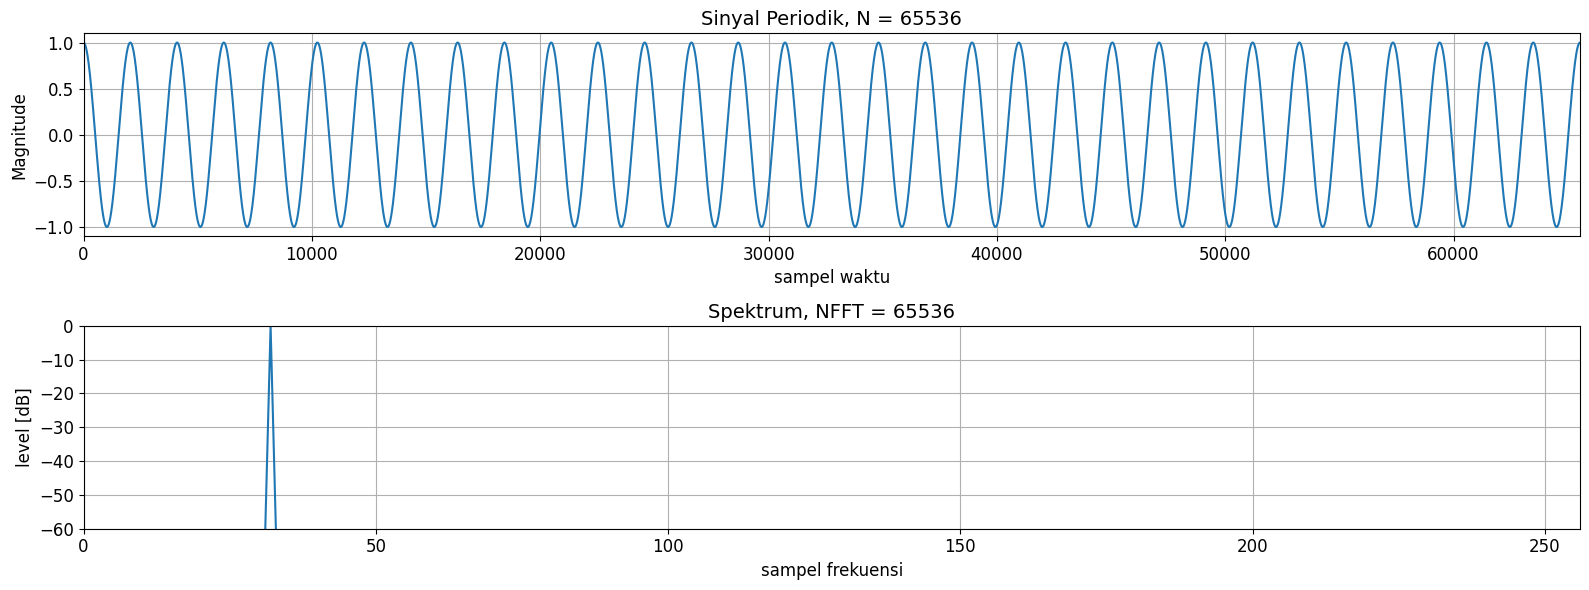

In [5]:
# Parameter-input
N = 65536

# Sinyal masukan (panjang: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Menghitung FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

# Membuat plot
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Sinyal Periodik, N = {}'.format(N))
plt.xlabel('sampel waktu')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spektrum, NFFT = {}'.format(N))
plt.xlabel('sampel frekuensi')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()

Gambar diatas terdiri dari dua grafik yang berkaitan dengan analisis sinyal dalam domain waktu dan domain frekuensi.

1. **Grafik Pertama (atas)**: Grafik ini menunjukkan representasi waktu dari suatu sinyal yang tampak periodik atau berulang. Sumu X bertanda "sample waktu" yang mendefinisikan indeks sampel dari sinyal tersebut. Sumbu Y adalah "Amplitude" yang menunjukkan nilai amplitudo sinyal pada setiap titik sampel. Karena grafik ini menunjukkan variasi amplitudo terhadap waktu, ini adalah representasi dari sinyal dalam domain waktu. Judul grafik, "Sinyal Periodik, N = 65536" menunjukkan bahwa data sinyal ini memiliki 65536 titik data.

2. **Grafik Kedua (bawah)**: Grafik ini merupakan analisis frekuensi dari sinyal yang sama, yang sering disebut sebagai 'transformasi Fourier' atau lebih khusus, menggunakan Fast Fourier Transform (FFT). Sumbu X disini menunjukkan "sample frekuensi," yang mengindikasikan frekuensi komponen yang ada dalam sinyal. Sumbu Y yang lebih rendah menunjukkan "Magnitude" yang relative, menunjukkan seberapa kuat atau dominan frekuensi tertentu dalam sinyal. Puncak yang sangat tajam pada frekuensi rendah menunjukkan bahwa sebagian besar energi sinyal terkonsentrasi pada frekuensi rendah tersebut, sesuai dengan sinyal periodik yang tampil di grafik pertama. Judul, "Spektrum, NFFT = 65536" menunjukkan jumlah titik yang digunakan dalam transformasi FFT, yang juga 65536.

In [6]:
def dft_win(w):
    """
    Plot fungsi jendela dan spektrum dari jendela

    Parameters
    ----------
    w : np.array
        vektor jendela masukan
    """

    # Temukan panjang jendela
    N = len(w)
    # Ukuran FFT
    NFFT = 2**12
    # Hitung FFT
    W = fftshift(fft(w, NFFT))
    # Temukan nilai maksimum dan tambahkan nilai floating-point minimum (kecuali bagi dengan nol)
    W = W / np.amax(W) + np.nextafter(0,1)
    tt = np.linspace(-1, 1, NFFT)

    # plot fungsi jendela dan spektrumnya
    fig = plt.figure(figsize=(16, 6))

    plt.subplot(2,1,1)
    plt.stem(w, use_line_collection=True, basefmt='C0')
    plt.title('Fungsi Jendela')
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.plot(tt, 20*np.log10(np.abs(W)))
    plt.title('Spektrum')
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
    plt.tight_layout()

<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


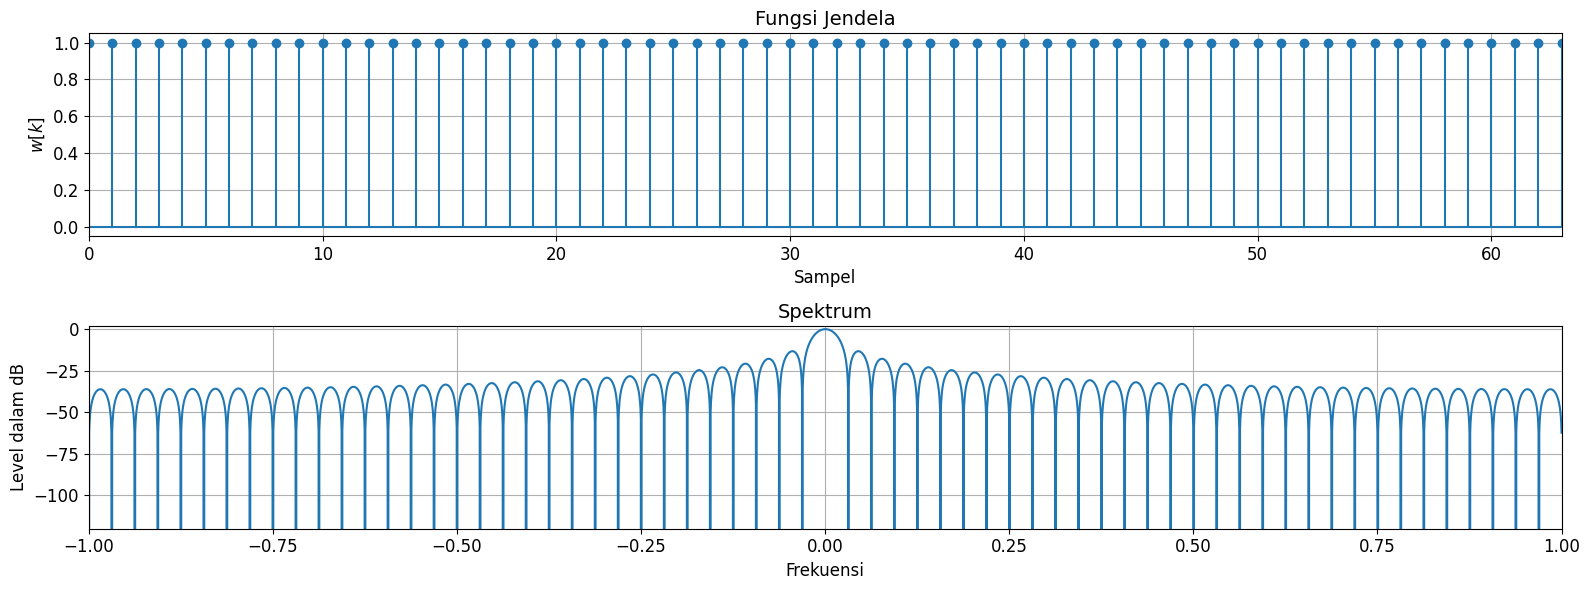

In [7]:
# Ukuran jendela
N = 64
# Memanggil fungsi dft_win dengan jendela yang terdiri dari nilai satu sebanyak N kali
dft_win(np.ones(N))

Gambar diatas menampilkan dua grafik yang terkait dengan analisis sinyal atau pemrosesan sinyal.

1. **Grafik Pertama (Fungsi Jendela)**
   - Grafik ini menampilkan apa yang disebut sebagai "Fungsi Jendela" dalam pemrosesan sinyal. Fungsi jendela digunakan untuk memotong segmen sinyal sebelum melakukan transformasi Fourier.
   - Sumbu y menunjukkan amplitudo, dan sumbu x menunjukkan indeks sampel dari jendela.
   - Bentuk ini tampak seperti fungsi "dirac delta," yang berarti nilai signifikan hanya pada titik tertentu sementara nilai lainnya hampir nol, menunjukkan fokus pada titik-titik tersebut dalam analisis.

2. **Grafik Kedua (Spektrum)**
   - Grafik ini menampilkan spektrum sinyal, yang diperoleh dari transformasi Fourier fungsi pada grafik pertama.
   - Sumbu y menunjukkan magnitudo dalam domain frekuensi, dan sumbu x menunjukkan frekuensi.
   - Grafik ini menunjukkan seberapa sering munculnya komponen frekuensi tertentu dalam sinyal. Grafik spektrum menunjukkan puncak pada frekuensi tertentu, yang mungkin menunjukkan bahwa jendela sinyal memiliki frekuensi dominan.

<ipython-input-8-ac65169fe6ad>:4: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.triang(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


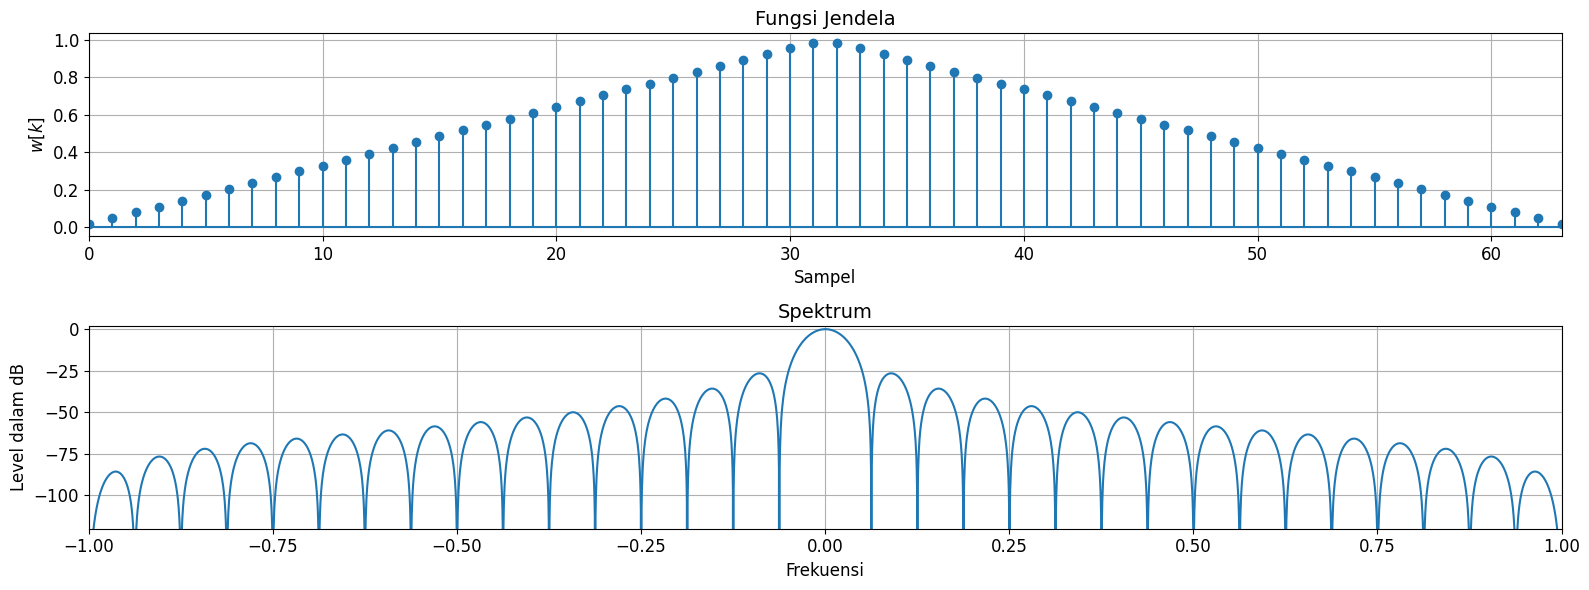

In [8]:
# Panjang jendela
N = 64
# Memplot fungsi jendela dan spektrumnya menggunakan jendela segitiga dengan panjang N
dft_win(sig.triang(N))

Gambar diatas menampilkan dua grafik, masing-masing dengan presentasi data yang berbeda:

1. **Grafik Atas - Fungsi Jendela (Fungsi Jendela):**
   - Grafik ini memplotkan fungsi jendela pada rentang sampel (berlabel "Sampel" pada sumbu x yang bergerak dari 0 hingga 60).
   - Sumbu y, yang diberi label "% Max", berskala dari 0,0 hingga 1,0, kemungkinan besar mewakili amplitudo fungsi jendela sebagai persentase dari nilai maksimumnya.
   - Plot menunjukkan kurva berbentuk lonceng yang simetris, tipikal fungsi window yang digunakan dalam pemrosesan sinyal untuk mengurangi efek tepi.

2. **Grafik Bawah - Spektrum:**
   - Grafik ini mengilustrasikan spektrum, dengan sumbu x yang diberi label "Frekuensi" mulai dari -1,00 hingga 1,00, yang mewakili frekuensi.
   - Sumbu y, berlabel "dB" dan berskala dari -1,00 hingga 0,00, mengindikasikan tingkat desibel, skala logaritmik untuk mengukur amplitudo.
   - Plot menggambarkan serangkaian puncak dan lembah yang membentuk pola seperti sinusoidal yang teratur, yang kemungkinan besar mewakili respons frekuensi dari fungsi jendela yang ditunjukkan pada grafik atas.

<ipython-input-9-eeff372c1d2c>:4: DeprecationWarning: Importing cosine from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.cosine' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.cosine(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


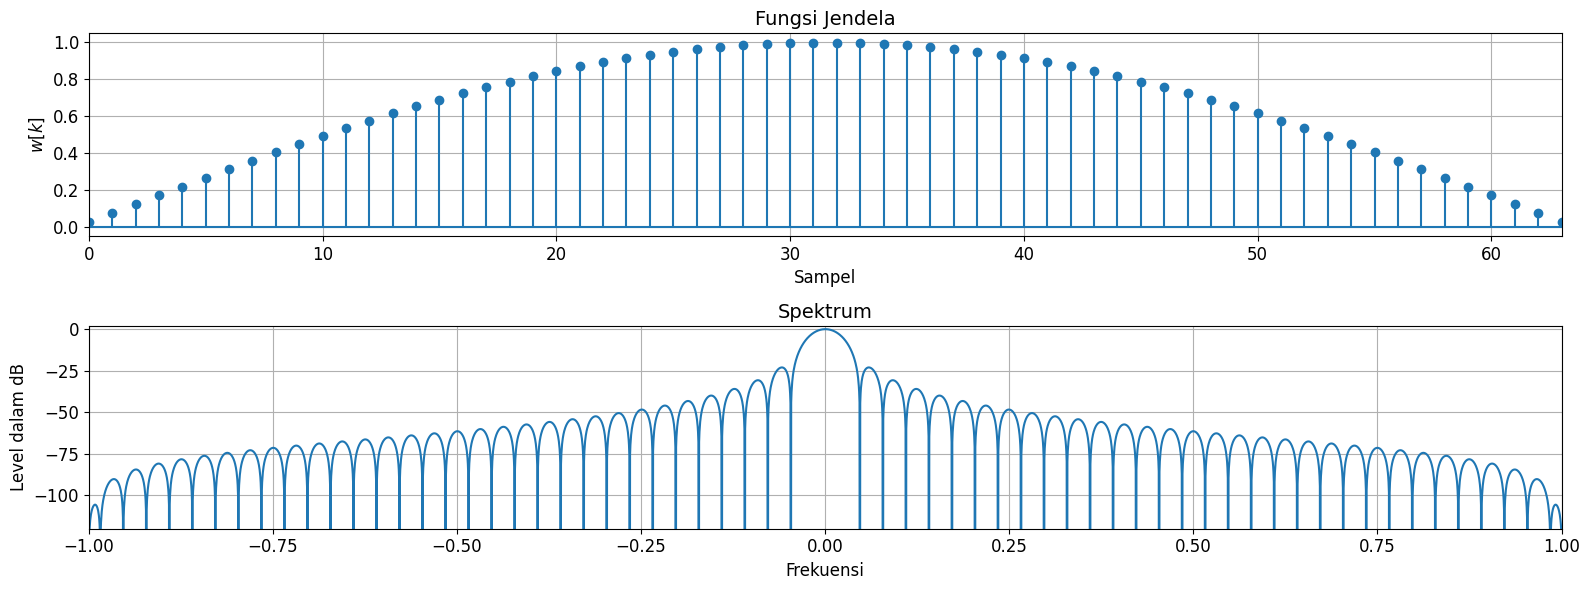

In [9]:
# Panjang jendela
N = 64
# Memplot fungsi jendela dan spektrumnya dengan menggunakan fungsi kosinus
dft_win(sig.cosine(N))

Gambar diatas menampilkan dua grafik yang berkaitan dengan analisis sinyal atau fungsi.

1. **Grafik Pertama (atas) - Fungsi/Jendela:**
   - Judul grafik ini adalah "Fungsi/Jendela".
   - Grafik ini menampilkan sebuah fungsi yang sepertinya memiliki bentuk seperti lonceng atau fungsi Gaussian, yang umum dalam pemrosesan sinyal sebagai jendela fungsi. Jendela fungsi digunakan untuk membatasi sebuah sinyal ke dalam segmen yang lebih kecil untuk analisis lebih lanjut.
   - Sumbu horizontal (X-axis) dijelaskan sebagai "Sampel". Ini mengindikasikan jumlah sampel atau titik data dalam fungsi yang ditampilkan.
   - Sumbu vertikal (Y-axis) ditandai sebagai "% PR" yang mungkin mengacu pada persentase dari suatu nilai referensi atau ukuran relativ lainnya.

2. **Grafik Kedua (bawah) - Spektrum:**
   - Judul grafik ini adalah "Spektrum".
   - Grafik ini tampaknya menunjukkan spektrum frekuensi dari fungsi atau sinyal yang didefinisikan di grafik pertama. Spektrum ini menunjukkan bagaimana amplitudo fungsi distribusi terhadap frekuensi.
   - Sumbu horizontal (X-axis) dijelaskan sebagai "Frekuensi", ini menunjukkan rentang frekuensi yang dianalisis dari sinyal tersebut.
   - Sumbu vertikal (Y-axis) menggunakan satuan dB/Hz bisa diinterpretasikan sebagai level daya per unit frekuensi dalam desibel per Hertz, yang umum digunakan untuk mengekspresikan kepadatan spektral.

<ipython-input-10-9b3826a16267>:4: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hann(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


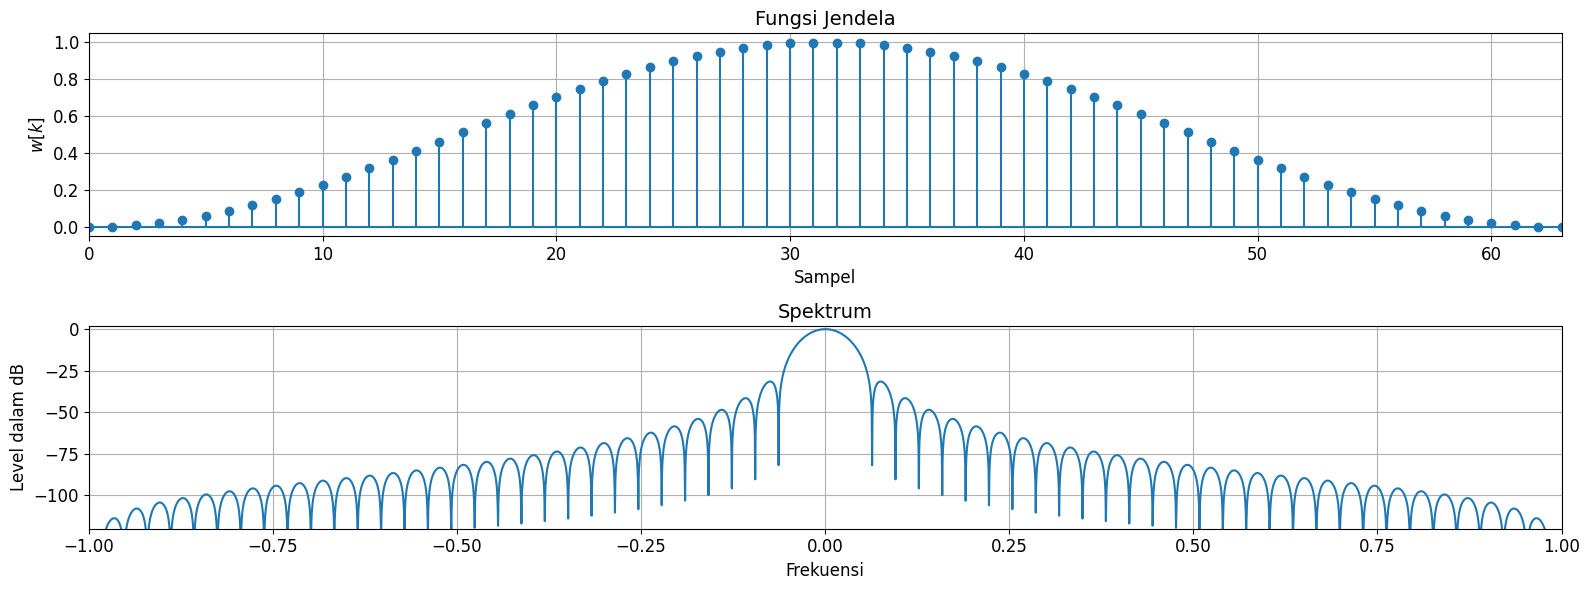

In [10]:
# Definisikan panjang jendela
N = 64
# Panggil fungsi dft_win dengan jendela Hann
dft_win(sig.hann(N))

Gambar diatas menampilkan dua bagian atau plot, yang masing-masing mengilustrasikan fungsi dan spektrum dari suatu sinyal atau data.

1. **Bagian Atas (Fungsi Jendela):**
   - Grafik ini menampilkan sebuah fungsi yang tampaknya merupakan "window function" atau fungsi jendela. Fungsi jendela umumnya digunakan dalam analisis sinyal untuk mengisolasi bagian tertentu dari data.
   - Sumbu horizontal (X-axis) bertuliskan "Sampel" yang menunjukkan nomor sampel dari sinyal, sementara sumbu vertikal (Y-axis) bertuliskan "% A";
   - Bentuk kurva mirip dengan jendela Gauss atau normal distribution, di mana titik-titik data terkonsentrasi di tengah dan menurun ke arah pinggir.

2. **Bagian Bawah (Spektrum):**
   - Grafik ini menampilkan spektrum dari fungsi jendela yang diberikan di bagian atas, kemungkinan besar ini adalah Transformasi Fourier dari fungsi tersebut.
   - Sumbu horizontal (X-axis) bertuliskan "Frekuensi" yang menunjukkan frekuensi komponen dalam Fourier transform.
   - Sumbu vertikal (Y-axis) bertuliskan "$|y(\omega)|" yang merupakan magnitude dari transformasi Fourier. Ini mengindikasikan seberapa besar kekuatan (amplitude) komponen frekuensi tertentu dalam fungsi.

<ipython-input-11-fb919869a782>:4: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.hamming(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


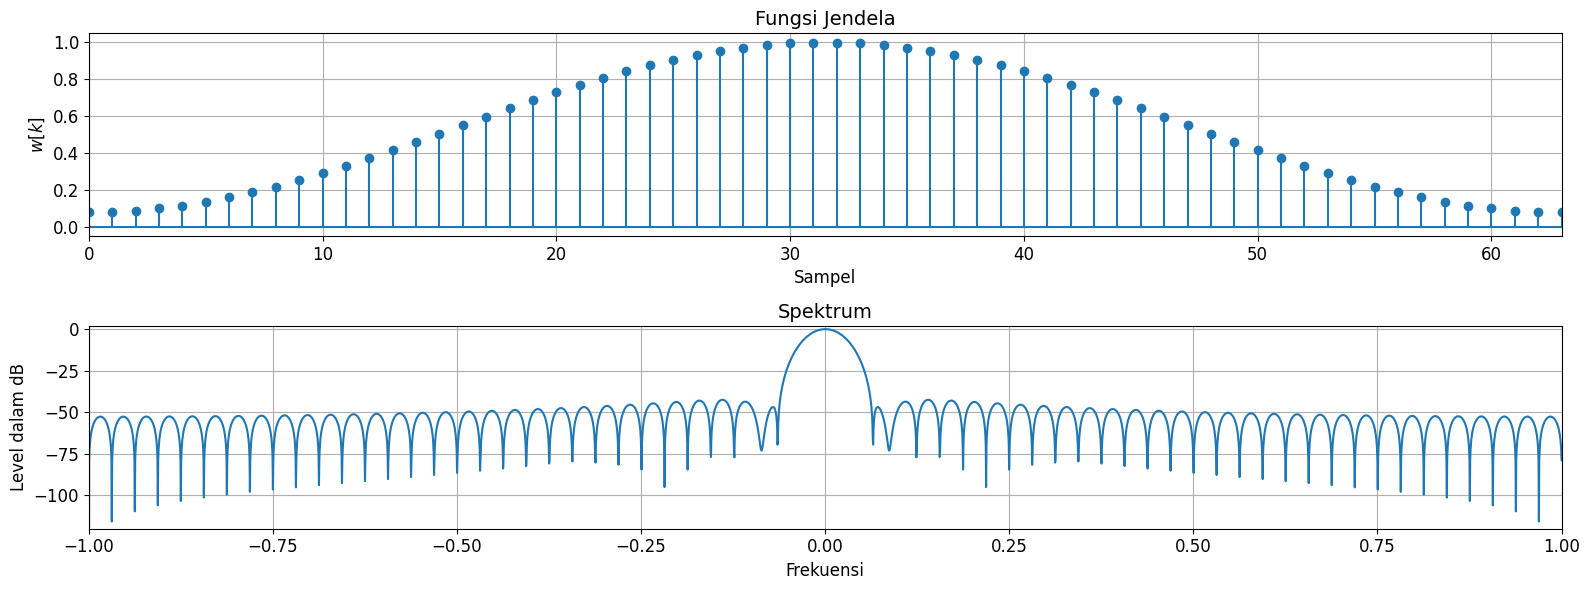

In [11]:
# Mendefinisikan panjang jendela
N = 64
# Memanggil fungsi untuk plot fungsi jendela dan spektrumnya dengan menggunakan jendela Hamming
dft_win(sig.hamming(N))

Gambar diatas menampilkan dua grafik yang berbeda, masing-masing ditampilkan dalam sistem koordinat Kartesius:

1. **Grafik Pertama (Atas):**
   Grafik ini menampilkan sebuah kurva yang memiliki bentuk parabola terbalik, memberikan kesan grafik distribusi. Ini biasanya menggambarkan suatu distribusi data atau probabilitas yang sering terlihat dalam statistik, seperti distribusi normal atau Gauss. Titik-titik dalam grafik ini terhubung dengan garis, menciptakan visualisasi yang mulus dari distribusi yang memiliki puncak tertinggi di tengah dan menurun secara simetris ke arah kedua ujung sumbu horizontal.

2. **Grafik Kedua (Bawah):**
   Grafik ini terlihat seperti representasi dari gelombang atau osilasi, dimana terdapat puncak dan lembah yang berulang dengan frekuensi tertentu, dan tampaknya menggambarkan sebuah gelombang sinusoidal atau cosinusoidal seperti yang ditemukan dalam studi tentang fisika gelombang atau analisis sinyal. Grafik ini menampilkan kombinasi dari beberapa gelombang dengan amplitudo dan frekuensi yang berbeda, yang dapat menggambarkan fenomena seperti interferensi gelombang.

<ipython-input-12-e38fdad1e4c6>:4: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackman(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


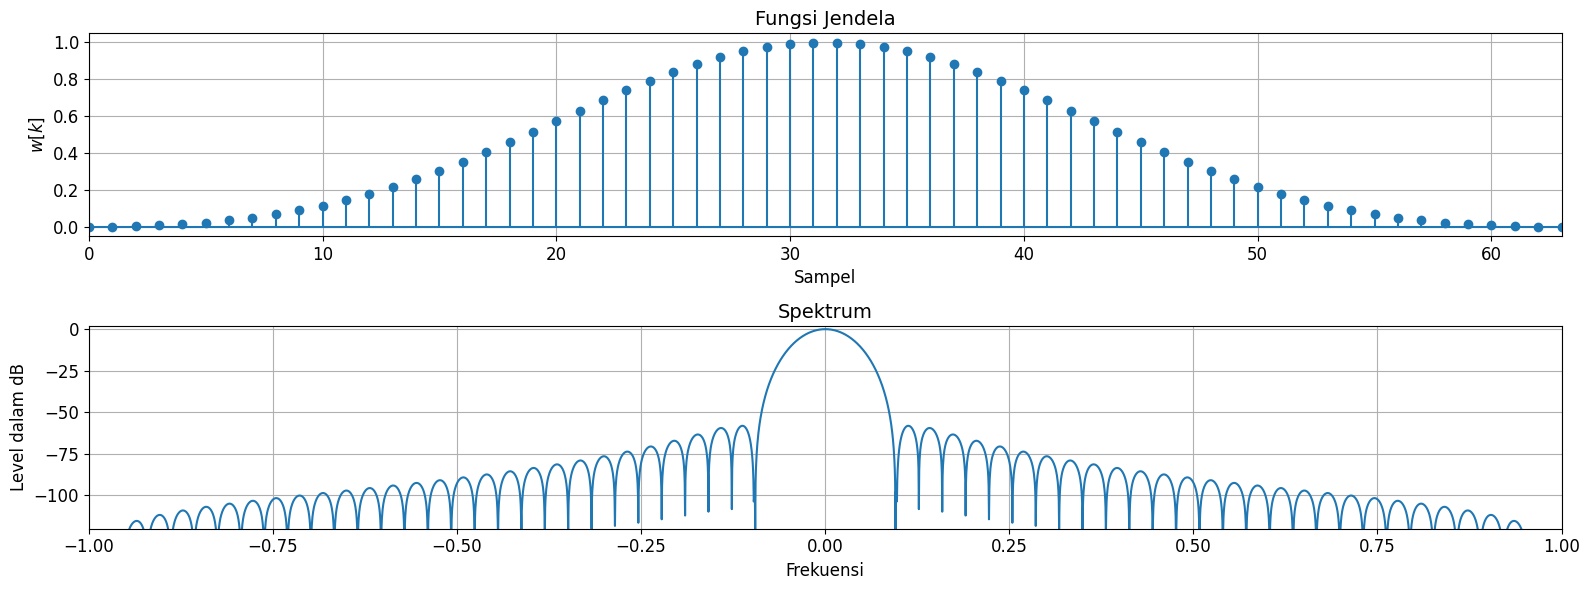

In [12]:
# Memilih panjang jendela
N = 64
# Memanggil fungsi dft_win untuk memplot jendela Blackman dan spektrumnya
dft_win(sig.blackman(N))

Gambar diatas menampilkan dua bagian grafik yang berkaitan dengan analisis sinyal atau data menggunakan transformasi Fourier.

1. **Bagian Atas (Fungsi Jendela):**
   - Grafik ini menunjukkan representasi dari suatu fungsi jendela, yang digunakan dalam pengolahan sinyal untuk mengurangi efek samping (leakage) selama transformasi Fourier.
   - Sumbu horizontal (x-axis) menunjukkan "Sampel" yang bisa diartikan sebagai indeks atau waktu untuk setiap titik data pada fungsi jendela.
   - Sumbu vertikal (y-axis) menunjukkan nilai dari fungsi jendela tersebut dalam % dari nilai maksimalnya.
   - Fungsi jendela ini memiliki bentuk yang meningkat, menyentuh puncak, dan kemudian menurun, biasanya digunakan untuk memfokuskan analisis pada bagian tertentu dari sinyal dengan mengurangi pengaruh data di awal dan di akhir sampel.

2. **Bagian Bawah (Spektrum):**
   - Grafik bawah menunjukkan spektrum dari fungsi jendela yang ditunjukkan di bagian atas, setelah dilakukan transformasi Fourier.
   - Sumbu horizontal menunjukkan frekuensi, yang wakil dari komponen frekuensi yang ada dalam sinyal.
   - Sumbu vertikal menunjukkan magnitudo dari spektrum dalam dB pada skala desibel, yang menunjukkan tingkat kekuatan atau amplitudo dari masing-masing komponen frekuensi.
   - Grafik ini mencerminkan kontribusi frekuensi dari fungsi jendela, menunjukkan maior amplitudo di sekitar frekuensi 0 dan mengecil saat menjauhi pusat.

<ipython-input-13-0ae2ede9ee6f>:4: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.blackmanharris(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


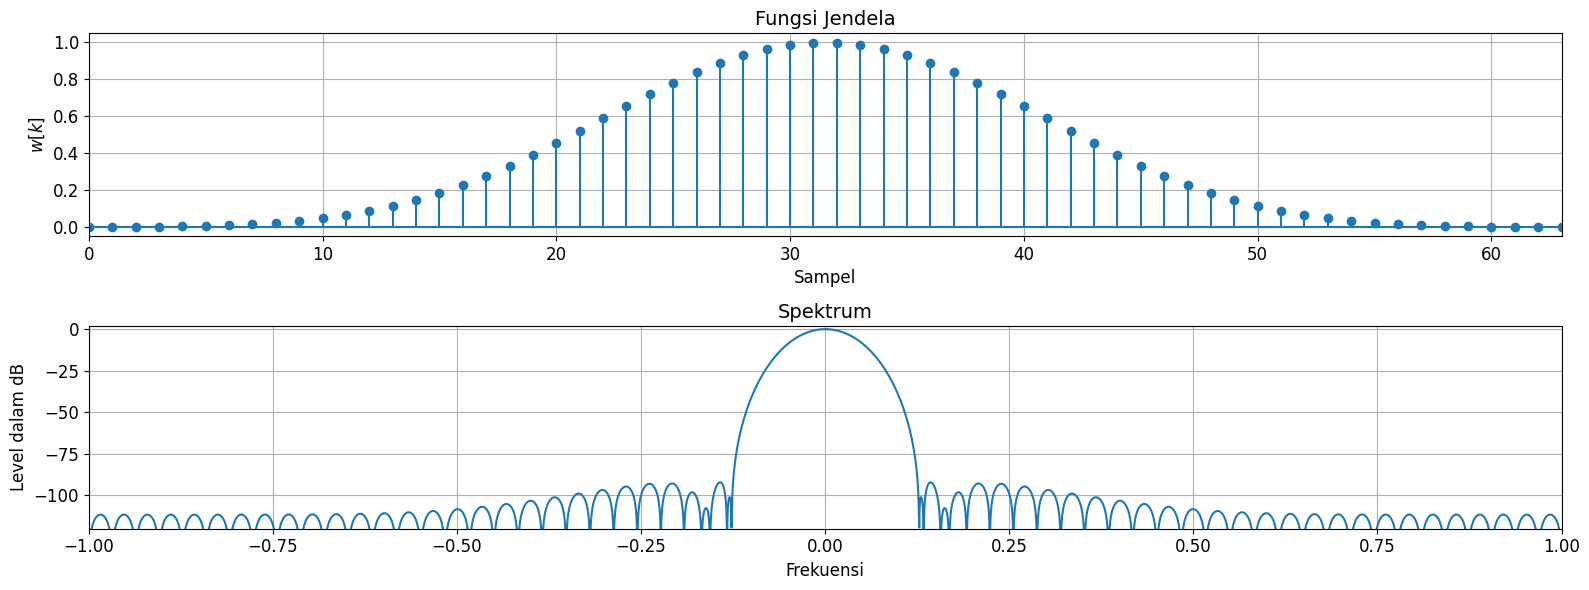

In [13]:
# Definisikan panjang jendela
N = 64
# Terapkan fungsi jendela Blackman-Harris
dft_win(sig.blackmanharris(N))

Gambar diatas menampilkan dari dua bagian yang saling terkait, yaitu diagram yang memperlihatkan sebuah "Fungsi Jendela" dan spektrum frekuensinya.

1. **Fungsi Jendela (Bagian Atas):**
   - Grafik ini menampilkan sebuah fungsi dalam domain waktu, dimana sumbu-X menyatakan "Sampel" dan sumbu-Y menyatakan "y(t)". Fungsi yang ditampilkan tampak mirip dengan "window function" (fungsi jendela) yang biasa digunakan dalam pemrosesan sinyal untuk memodifikasi sinyal sebelum transformasi Fourier. Tujuannya adalah untuk meminimalisir efek samping (side-lobes) saat melakukan analisis frekuensi. Contohnya ini bisa merupakan "Blackman window" atau jenis window function yang serupa yang membantu dalam mengurangi leakage di frekuensi yang tidak diharapkan.

2. **Spektrum (Bagian Bawah):**
   - Grafik yang lebih rendah menunjukkan spektrum atau transformasi Fourier dari fungsi jendela yang ada di atas. Sumbu-X merepresentasikan "Frekuensi" dan sumbu-Y adalah magnitudo dari frekuensi tersebut (biasanya dalam dB). Spektrum ini memperlihatkan bagaimana energi pada sinyal original terdistribusi di berbagai frekuensi. Peak utama menunjukkan frekuensi dominan dari sinyal asli, sedangkan bentuk dan lebar dari peak tersebut juga memberikan informasi mengenai karakteristik dari window function yang digunakan.

<ipython-input-14-2b634ca8ed00>:4: DeprecationWarning: Importing nuttall from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.nuttall' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.nuttall(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


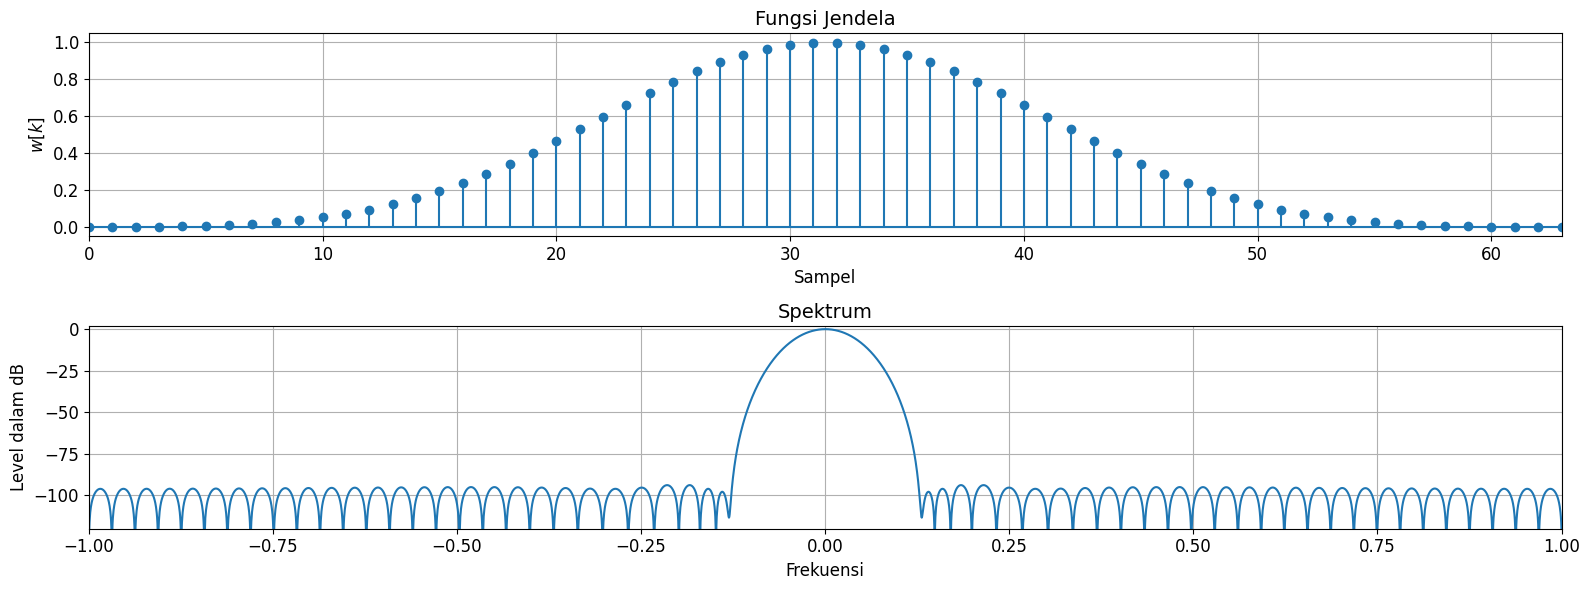

In [14]:
# Memilih panjang jendela
N = 64
# Memanggil fungsi untuk menampilkan jendela Nuttall
dft_win(sig.nuttall(N))

Gambar diatas menampilkan dua plot yang berkaitan dengan pemrosesan sinyal atau analisis data.

1. **Plot Pertama (atas)** - Judulnya "Fungsi: Jendela", yang mengindikasikan ini mungkin grafik einer Jendela (window function) dalam pemrosesan sinyal. Grafik menunjukkan nilai pada sumbu vertikal (y-axis) yang diwakili oleh "% dari Maks" (persentase dari nilai maksimum) terhadap "Sampel" (sample) pada sumbu horizontal (x-axis). Bentuk plot menyerupai kurva simetris yang sering digunakan untuk memperhalus tepian data dalam pemrosesan sinyal, sehingga mengurangi efek samping (side effects) seperti kebocoran spektral.

2. **Plot Kedua (bawah)** - Judulnya "Spektrum", mengindikasikan ini adalah representasi frekuensi dari fungsi jendela yang diperlihatkan di plot pertama. Plot ini menunjukkan nilai "Power" (Kekuatan Sinyal) pada sumbu vertikal (y-axis) yang diukur dalam dB (decibel) terhadap "Frekuensi" pada sumbu horizontal (x-axis). Grafik spektrum ini menunjukkan bagaimana energi sinyal terdistribusi di berbagai frekuensi. Puncak di tengah menunjukkan konsentrasi energi terbesar di frekuensi rendah dengan penyebaran ke frekuensi yang lebih tinggi mengikuti penurunan kekuatan.


<ipython-input-15-815a8c8e7288>:4: DeprecationWarning: Importing flattop from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.flattop' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.flattop(N))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


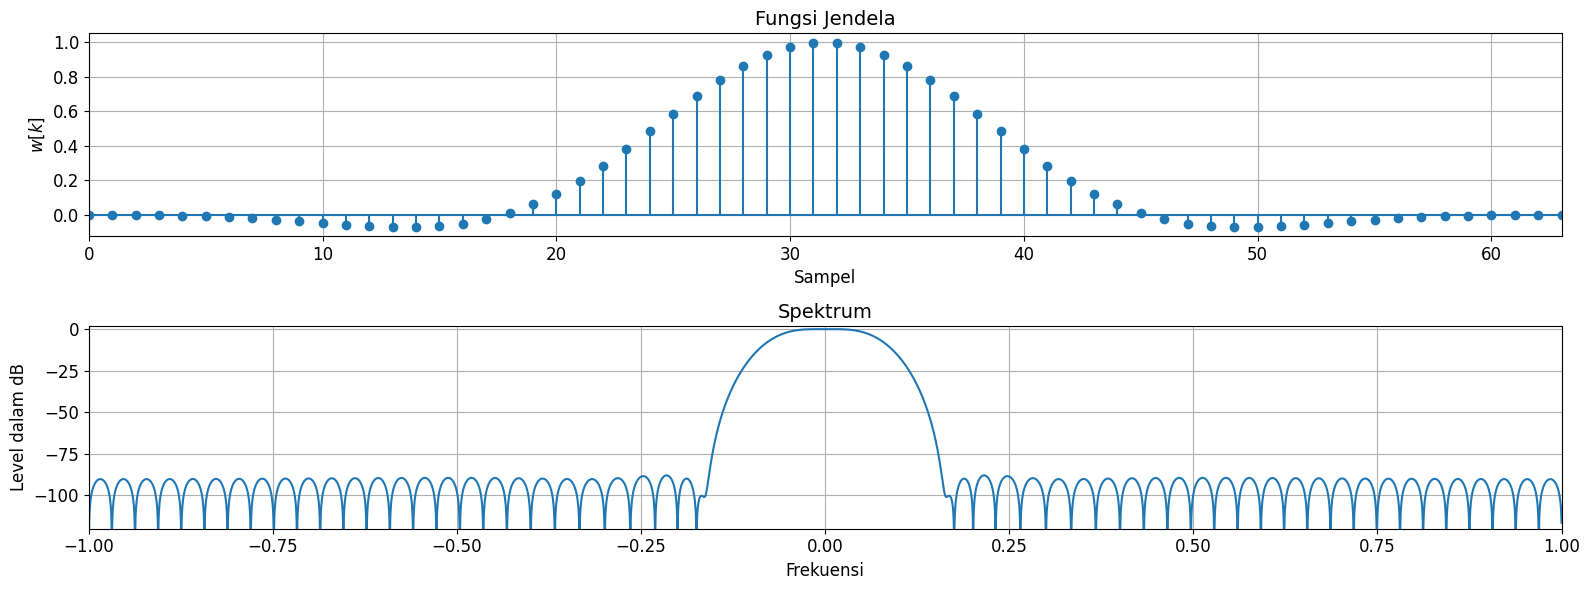

In [15]:
# Input parameter N
N = 64
# Memanggil fungsi dft_win dengan menggunakan jendela flattop dari scipy.signal
dft_win(sig.flattop(N))

Gambar diatas menampilkan dua plot yang berhubungan dengan pemrosesan sinyal atau analisis data terkait fungsi dan spektrum frekuensi dari fungsi tersebut.

1. **Plot Atas: Fungsi Jendela**
   - Plot ini menunjukkan pembentukan "fungsi jendela," yang biasanya digunakan untuk memodifikasi atau mengisolasi sebagian dari data atau sinyal.
   - Sumbu horizontal (x-axis) menunjukkan "Sample," yang bisa merupakan indeks waktu atau urutan data.
   - Sumbu vertikal (y-axis) menunjukkan nilai dari fungsi tersebut pada setiap sampel.
   - Grafiknya menunjukkan bentuk yang mirip dengan distribusi normal atau bentuk bel, yang mencapai puncak di sekitar sampel 30 dan kemudian turun secara simetris ke kedua sisi.

2. **Plot Bawah: Spektrum**
   - Plot ini menampilkan "Spektrum" dari fungsi jendela yang diberikan di atas. Ini adalah representasi frekuensi dari fungsi jendela, sering digunakan dalam analisis Fourier untuk memahami komponen frekuensi dari sinyal.
   - Sumbu horizontal menunjukkan frekuensi dari sinyal dalam satuan Hertz (Hz) atau siklus per detik.
   - Sumbu vertikal menunjukkan Magnitude dari transformasi Fourier, diukur dalam dB (decibel), yang menggambarkan bagaimana amplitudo fungsi jendela tersebar di berbagai frekuensi.
   - Grafiknya memiliki bentuk yang sangat terpusat, dengan puncak utama di tengah (sekitar frekuensi 0) dan secara progresif menjadi lebih rendah ketika menjauhi puncak.

<ipython-input-16-a3c9104f6c59>:4: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=4))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


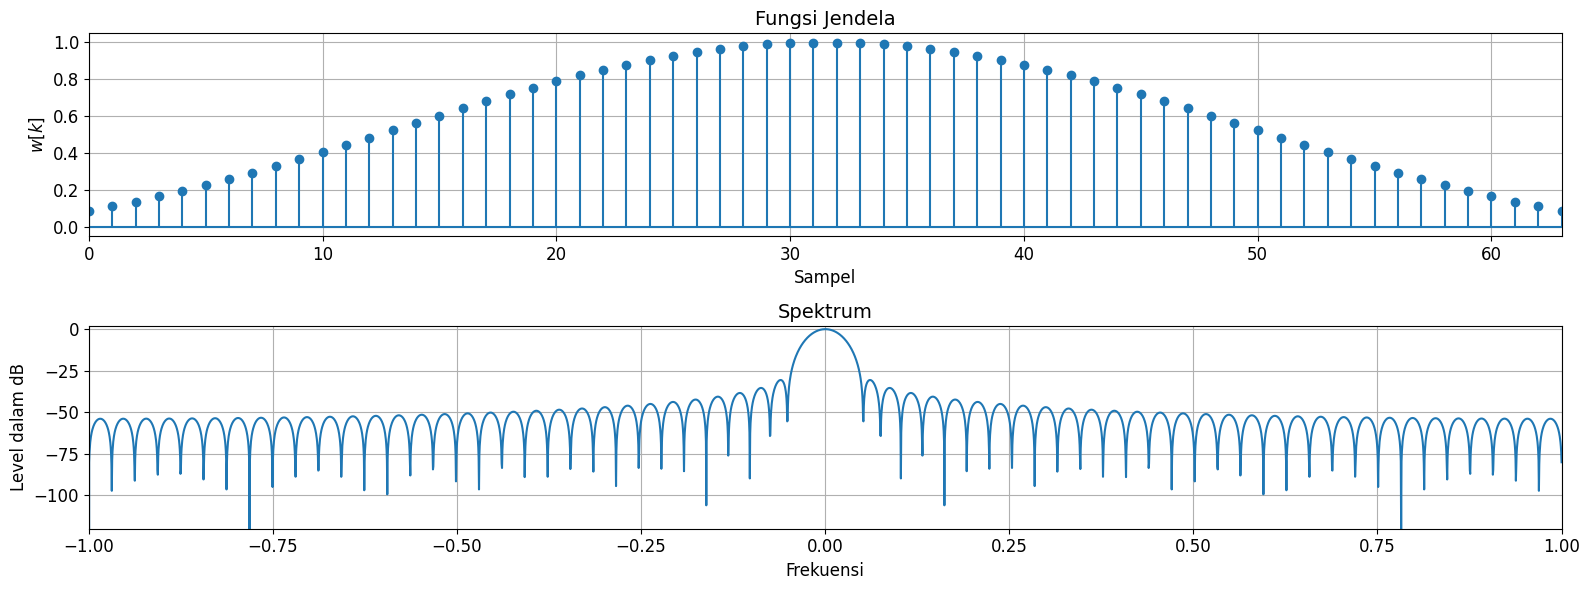

In [16]:
# Tentukan panjang jendela
N = 64
# Panggil fungsi dft_win dengan menggunakan jendela Kaiser
dft_win(sig.kaiser(N, beta=4))

Gambar diatas menampilkan dua plot yang berbeda dan berkaitan dengan pemrosesan sinyal atau analisis data.

1. **Plot Pertama (Atas) - Fungsi Jendela:**
   - Plot ini menunjukkan grafik yang tampaknya menggambarkan "fungsi jendela," yang digunakan dalam analisis Fourier untuk meminimalkan efek kebocoran sinyal. Biasanya, fungsi ini diterapkan pada data sebelum transformasi Fourier untuk memperhalus ujung-ujung data, sehingga hanya komponen tengah yang memiliki bobot penuh.
   - Sumbu horizontal (x) mungkin mewakili sampel atau waktu, dengan nilai dari 0 hingga 60.
   - Sumbu vertikal (y) mewakili amplitudo fungsi jendela, bergerak dari 0 hingga 1, mengindikasikan bagaimana setiap titik data dikalikan dengan nilai fungsi jendela untuk meredam efek di pinggir.

2. **Plot Kedua (Bawah) - Spektrum:**
   - Plot ini tampaknya menunjukkan spektrum dari transformasi Fourier, menggambarkan bagaimana frekuensi komponen tersebar melalui sinyal yang telah diterapkan dengan fungsi jendela.
   - Sumbu horizontal (x) menunjukkan frekuensi dengan rentang -1.00 hingga 1.00.
   - Sumbu vertikal (y) mungkin mewakili magnitudo (atau intensitas) dari frekuensi yang ada dalam sinyal, yang diukur dalam dB (desibel).
   - Puncak pada grafik menunjukkan frekuensi dominan dalam sinyal tersebut.

<ipython-input-17-584d484d05d5>:4: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.kaiser(N, beta=10))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


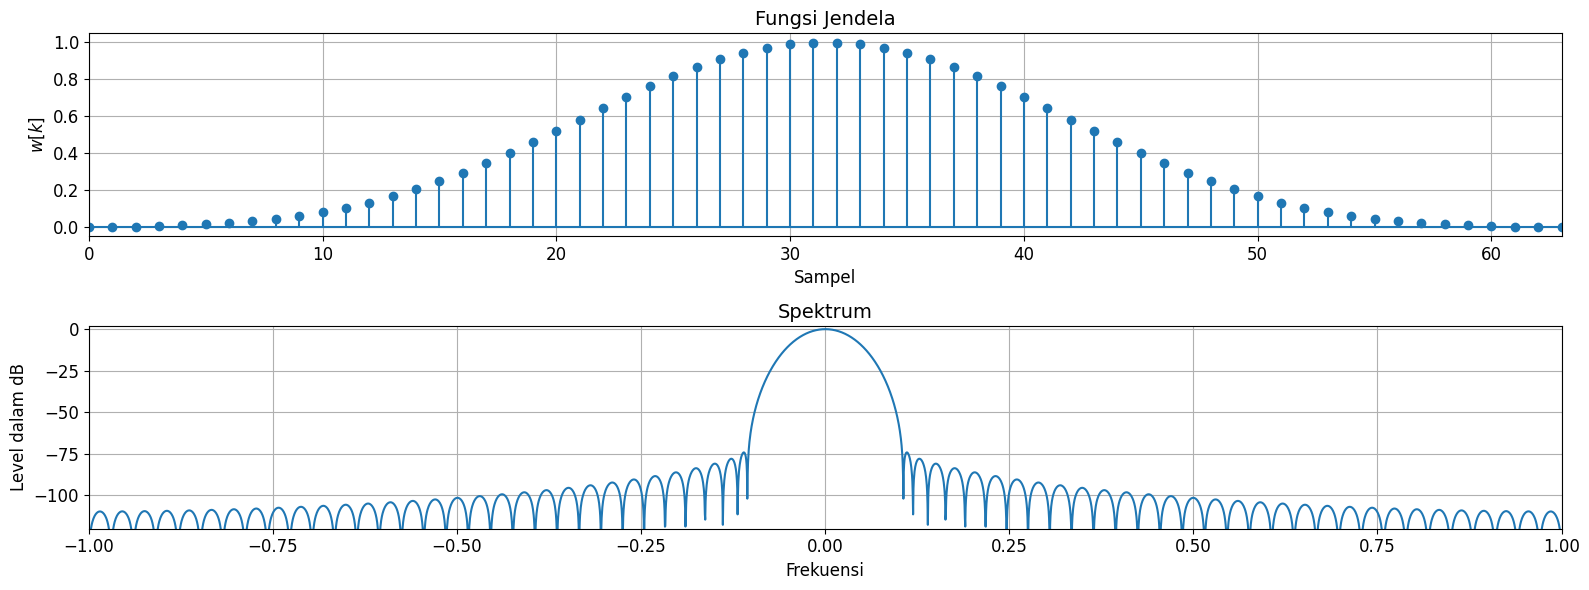

In [17]:
# Tentukan panjang jendela
N = 64
# Panggil fungsi dft_win dengan menggunakan jendela Kaiser
dft_win(sig.kaiser(N, beta=10))

Gambar diatas menampilkan dua plot yang berhubungan dengan analisis sinyal atau fungsi melalui teknik transformasi Fourier, yang umum digunakan dalam bidang rekayasa, fisika, dan statistik untuk menganalisis frekuensi komponen suatu sinyal atau fungsi.

1. **Plot Pertama (atas):** Ini menunjukkan sebuah plot dari fungsi dalam domain waktu atau sampel. Judulnya "Fungsi: Jendela" mengindikasikan fungsi ini kemungkinan besar menggunakan suatu "window function", yang digunakan untuk memodifikasi sinyal agar lebih cocok untuk analisis transformasi Fourier. Dalam plot ini, nilai-nilai y mencerminkan amplitudo sinyal pada setiap titik sampel (eje x), dan bentuknya menyerupai bel, yang tipikal untuk fungsi jendela seperti Gaussian atau jendela Hamming.

2. **Plot Kedua (bawah):** Ini menunjukkan spektrum frekuensi dari fungsi tersebut setelah diaplikasikan transformasi Fourier, sering disebut sebagai Fourier Transform (Transformasi Fourier). Plot dengan label "Spektrum" menunjukkan seberapa kuat komponen-komponen frekuensi tertentu hadir dalam sinyal asal. Ini digambarkan dalam domain frekuensi, dengan amplitudo (y-axis, dalam dB - decibel) sebagai fungsi dari frekuensi (x-axis). Bentuk puncak yang tajam di tengah menunjukkan adanya komponen frekuensi dominan di sekitar nilainya (mungkin di sekitar `0` dalam hal ini), sementara spektrumnya menyebar ke arah frekuensi yang lebih rendah dan lebih tinggi.

<ipython-input-18-4f36f7ca5e25>:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=16))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


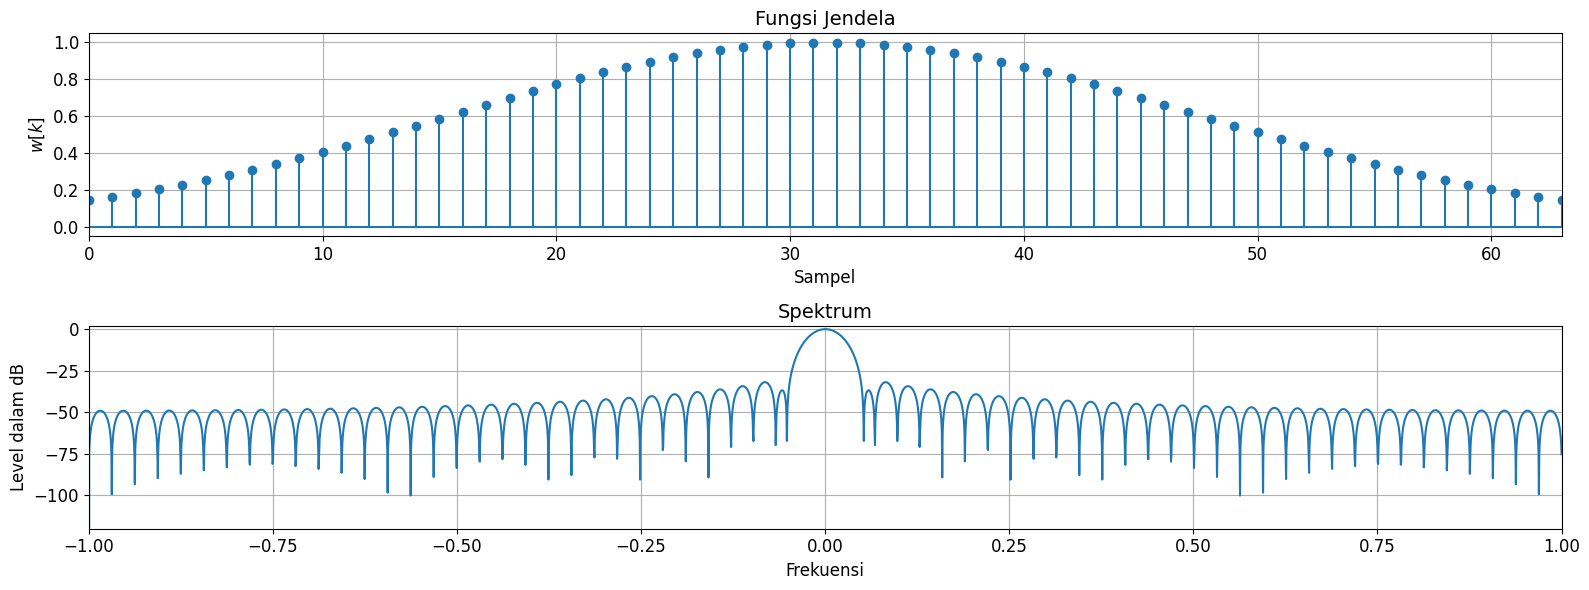

In [18]:
# Jumlah sampel jendela
N = 64
# Memanggil fungsi dft_win dengan menggunakan jendela gaussian dari scipy
dft_win(sig.gaussian(N, std=16))

Gambar diatas menampilkan dua grafik yang berbeda, yang satu di atas dan yang lainnya di bawah. Berikut adalah penjelasan untuk masing-masing grafik:

1. **Grafik Atas (Fungsi Jendela)**:
   - Grafik ini menggambarkan sebuah fungsi yang memiliki bentuk mirip dengan bel (bell-shaped) dan tampak simetris.
   - Sumbu horizontal (X-axis) dilabeli dengan "Sampel" yang menunjukkan jumlah sampel atau data poin.
   - Sumbu vertikal (Y-axis) dilabeli dengan "% MA" yang bisa merujuk pada persentase Moving Average atau interpretasi lain tergantung pada konteks data. Nilai ini menunjukkan tingkat atau skala nilai pada fungsi tersebut.
   - Grafik ini bisa mewakili penggunaan fungsi jendela dalam pemrosesan sinyal untuk meredam sisi ujung sinyal sebelum proses transformasi Fourier, biasanya untuk mengurangi efek samping atau "leakage" dalam analisis spektrum.

2. **Grafik Bawah (Spektrum)**:
   - Grafik ini menunjukkan spektrum dari suatu sinyal atau data yang diolah melalui transformasi Fourier, yang merepresentasikan komponen frekuensi dari sinyal tersebut.
   - Sumbu horizontal menunjukkan "Frekuensi" yang diukur dalam satuan yang sesuai (biasanya Hz dalam konteks sinyal fisik), menunjukkan seberapa cepat komponen sinyal berubah.
   - Sumbu vertikal menunjukkan amplitude dari transformasi Fourier, yang diukur dalam db/Hz dalam konteks ini.
   - Puncak yang jelas terlihat pada frekuensi sekitar -0.25 dan 0.25, menunjukkan adanya komponen frekuensi dominan pada sinyal tersebut.

<ipython-input-19-95b2b12e56b6>:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  dft_win(sig.gaussian(N, std=8))
<ipython-input-6-c9fc0b89d776>:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, use_line_collection=True, basefmt='C0')


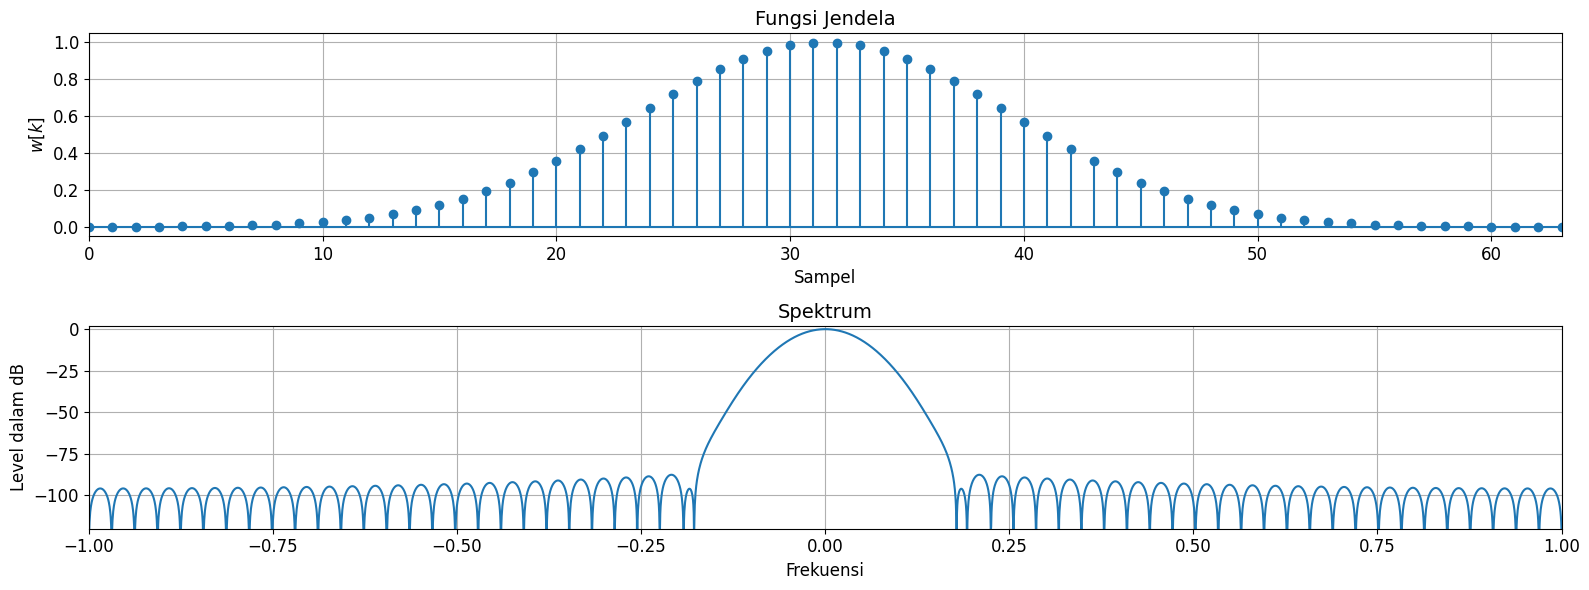

In [19]:
# Definisikan panjang jendela
N = 64
# Panggil fungsi dft_win dengan menggunakan jendela Gaussian dengan standar deviasi 8
dft_win(sig.gaussian(N, std=8))

Gambar diatas menampilkan dua grafik yang berkaitan dengan pemrosesan sinyal atau analisis data.

1. **Grafik Pertama (Fungsi Jendela):**
   - Grafik atas menunjukkan "Fungsi Jendela" yang tampak sebagai fungsi yang memiliki bentuk mirip bel, biasanya digunakan dalam pemrosesan sinyal untuk meminimalisir efek samping pada sinyal waktu terbatas ketika dilakukan transformasi Fourier.
   - Sumbu horizontal (X-axis) menandakan "Sampel" yang menunjukkan indeks atau urutan sampel dalam sinyal.
   - Sumbu vertikal (Y-axis) menandakan "Amplitudo" sinyal tersebut.

2. **Grafik Kedua (Spektrum):**
   - Grafik bawah menunjukkan "Spektrum" yang merupakan representasi frekuensi dari Fungsi Jendela yang ditampilkan pada grafik pertama.
   - Sumbu horizontal (X-axis) pada grafik ini menunjukkan "Frekuensi". Frekuensi ini diwakili dalam nilai yang ter-normalisasi, berkisar dari -1.00 hingga 1.00.
   - Sumbu vertikal (Y-axis) menunjukkan amplitudo dalam domain frekuensi, yang menggambarkan seberapa besar kekuatan atau intensitas untuk setiap frekuensi yang ada dalam fungsi jendela tersebut.

<ipython-input-20-f102fec5c735>:6: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,1] = sig.triang(N)
<ipython-input-20-f102fec5c735>:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,2] = sig.hann(N)
<ipython-input-20-f102fec5c735>:8: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  ww[:,3] = sig.hamming(N)
<ipython-input-20-f102fec5c735>:9: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signa

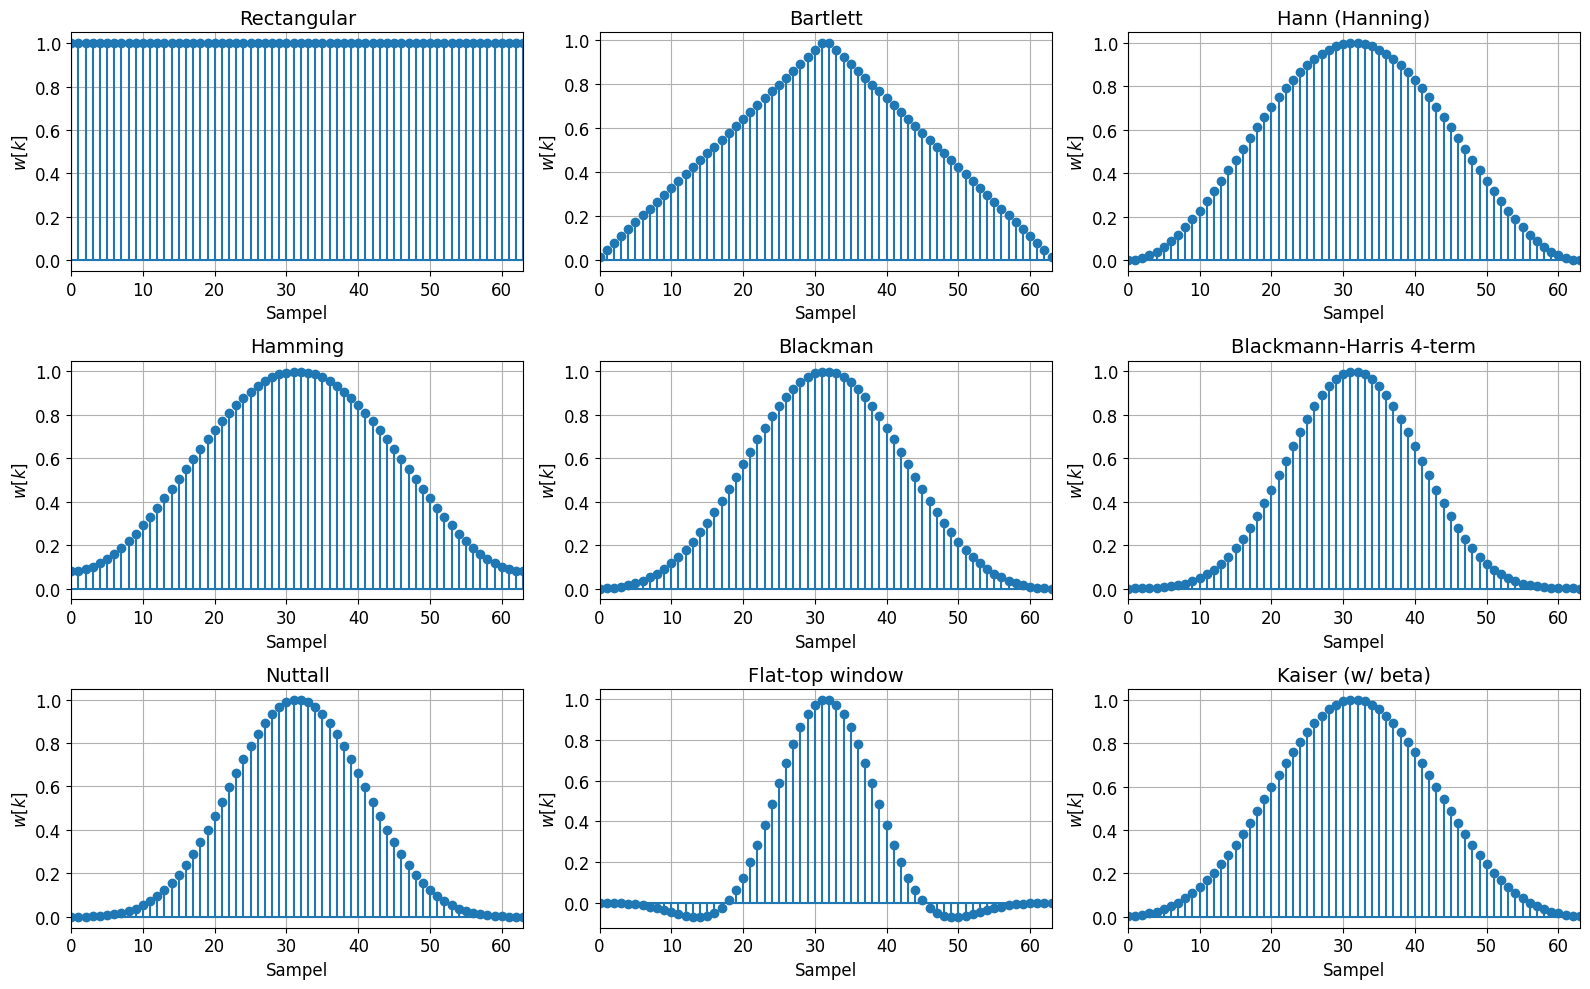

In [20]:
N = 64
# Semua jendela
ww = np.zeros((N, 9))

ww[:,0] = np.ones(N)
ww[:,1] = sig.triang(N)
ww[:,2] = sig.hann(N)
ww[:,3] = sig.hamming(N)
ww[:,4] = sig.blackman(N)
ww[:,5] = sig.blackmanharris(N)
ww[:,6] = sig.nuttall(N)
ww[:,7] = sig.flattop(N)
ww[:,8] = sig.kaiser(N, beta=8)

lst_titles = ['Rectangular', 'Bartlett', 'Hann (Hanning)',
              'Hamming', 'Blackman', 'Blackmann-Harris 4-term',
              'Nuttall', 'Flat-top window', 'Kaiser (w/ beta)'
             ]

# Plot fungsi jendela dan spektrumnya
fig = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.stem(ww[:,i], use_line_collection=True, basefmt='C0')
    plt.title(lst_titles[i])
    plt.xlabel('Sampel')
    plt.ylabel(r'$w[k]$')
    plt.xlim([0, N-1])
    plt.grid(True)
plt.tight_layout()

Gambar diatas menampilkan berbagai jenis jendela (window functions) yang digunakan dalam pemrosesan sinyal digital. Jendela-jendela ini digunakan untuk memodifikasi sinyal sebelum transformasi Fourier, yang membantu mengurangi kebocoran spektral. Setiap grafik menampilkan tipe jendela yang berbeda, dengan sumbu horizontal yang melambangkan jumlah sampel dan sumbu vertikal yang melambangkan amplitudo. Berikut adalah penjelasan untuk masing-masing jendela yang ditampilkan:

1. Rectangular: Jendela ini memiliki bentuk sederhana di mana semua nilai amplitudo konstan dan kemudian langsung turun menjadi nol. Ini tidak memberikan penghalusan apapun dan bisa menghasilkan kebocoran spektral yang signifikan.

2. Bartlett: Juga dikenal sebagai jendela segitiga, ini secara bertahap meningkat sampai ke titik tengah dan kemudian menurun. Penghalusan ini mengurangi kebocoran spektral tetapi tidak seefektif jendela lainnya.

3. Hann (Hanning): Jendela ini memiliki bentuk parabola dan dikenal baik dalam mengurangi kebocoran spektral dengan penghalusan yang efektif di sisi jendela.

4. Hamming: Mirip dengan jendela Hann tetapi dengan puncak yang sedikit lebih rendah di tepi, memberikan proteksi lebih terhadap kebocoran spektral.

5. Blackman: Ini memiliki bentuk yang lebih halus daripada Hann atau Hamming, menggunakan tiga istilah kosinus untuk mengurangi kebocoran lebih lanjut.

6. Blackman-Harris 4-term: Versi yang lebih canggih dari jendela Blackman, menggunakan empat istilah kosinus, memberikan salah satu penurunan kebocoran spektral terbaik yang tersedia.

7. Nuttall: Mirip dengan Blackman-Harris, tetapi dengan koefisien yang berbeda untuk istilah kosinusnya, memberikan sifat penurunan spektrum yang sangat baik.

8. Flat-Top window: Dirancang untuk memberikan amplitudo yang sangat datar di puncaknya, sangat berguna untuk aplikasi pengukuran amplitudo yang memerlukan akurasi tinggi.

9. Kaiser (w/ beta = 8.6): Jendela yang parameterisasi dengan parameter beta, yang dapat disesuaikan untuk memberikan kompromi antara lebar pita utama dan tingkat penurunan di luar pita.

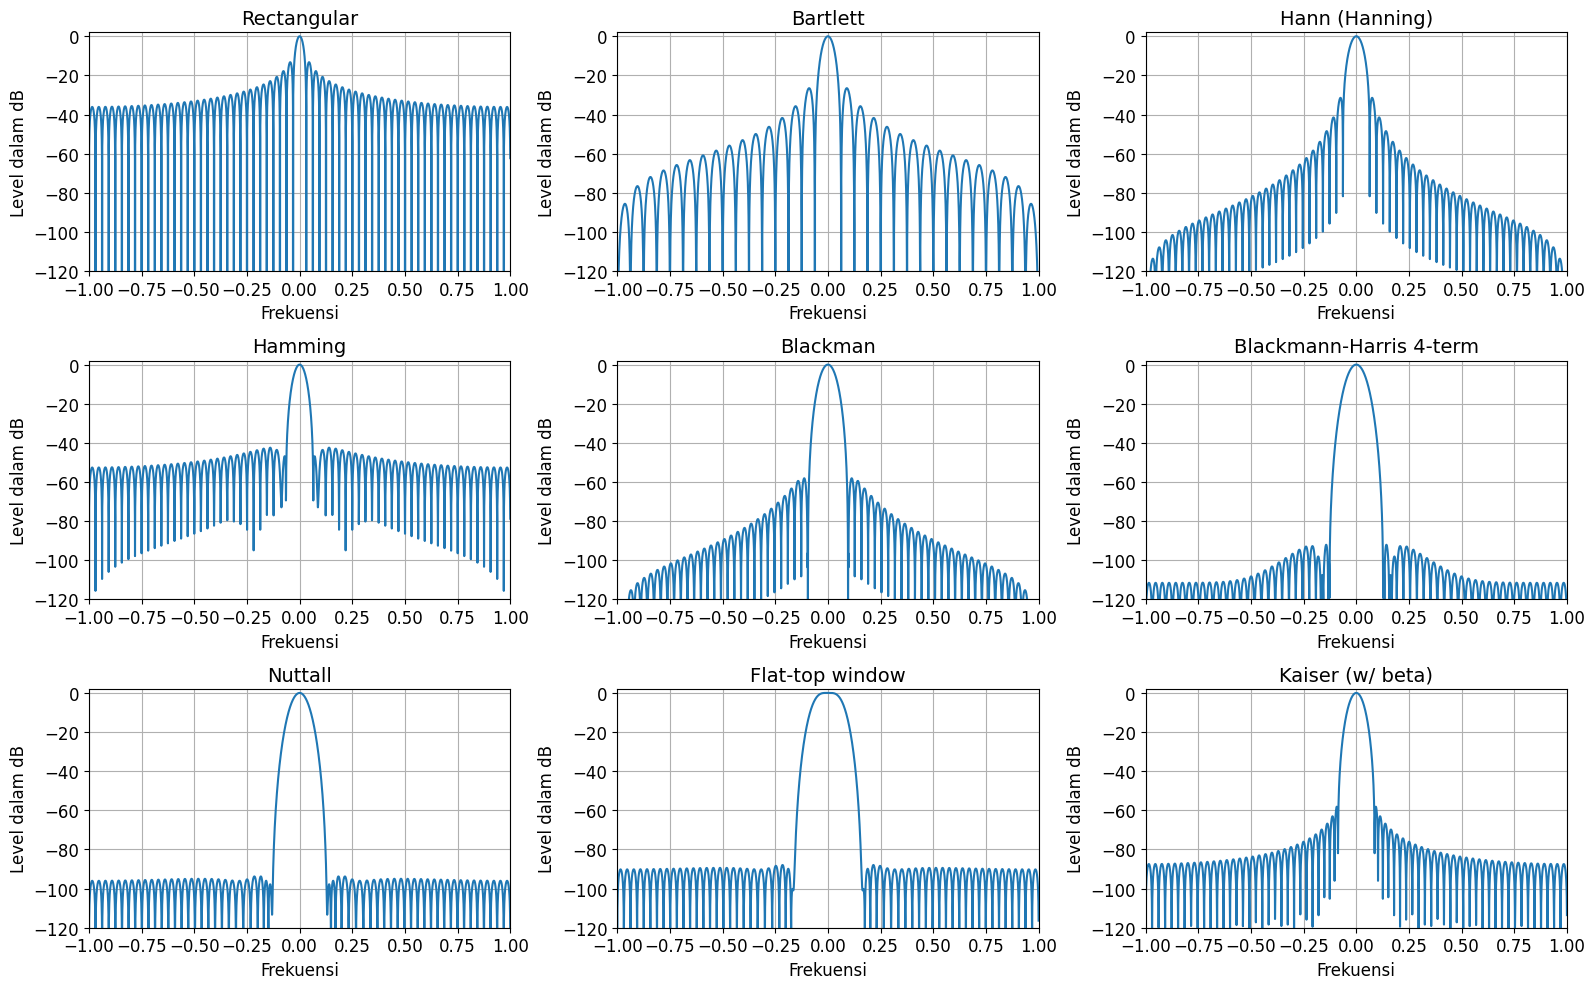

In [21]:
NFFT = 2**12
# Hitung FFT
WW = fft(ww, NFFT, axis=0)
WW = WW / np.amax(WW, axis=0) + np.nextafter(0,1)

tt = np.linspace(-1, 1, NFFT)

# Plot fungsi jendela dan spektrumnya
fig2 = plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(tt, 20*np.log10(np.abs(fftshift(WW[:,i]))))
    plt.title(lst_titles[i])
    plt.xlabel('Frekuensi')
    plt.ylabel('Level dalam dB')
    plt.axis([-1, 1, -120, 2])
    plt.grid(True)
plt.tight_layout()

Gambar diatas menampilkan kumpulan dari sembilan plot yang menggambarkan respons frekuensi logaritmik dari berbagai jenis jendela (window functions) yang digunakan dalam pengolahan sinyal digital. Setiap plot berjudul dengan nama jendela yang spesifik dan menampilkan dua sumbu: sumbu horizontal menunjukkan frekuensi (biasanya dalam radian per sampel) dan sumbu vertikal menunjukkan level gain dalam desibel (dB).

Berikut adalah penjelasan singkat tentang masing-masing jendela yang ditampilkan:

1. **Rectangular**: Jendela tipe ini tidak melakukan pemrosesan pada data tetapi mengambil sampelnya apa adanya. Ini menghasilkan respon frekuensi dengan banyak kebocoran atau leakage.

2. **Bartlett**: Juga dikenal sebagai segitiga, ini melemahkan data di kedua ujungnya, membantu mengurangi kebocoran tapi masih memiliki redaman yang cukup signifikan di pita stop.

3. **Hann (Hanning)**: Menggunakan cosinus untuk membentuk data yang direduksi secara bertahap, mengurangi kebocoran dan memiliki lobe samping yang rendah dibandingkan dengan jendela Rectangular.

4. **Hamming**: Mirip dengan Hann tapi dengan sedikit bentuk yang berbeda yang memberikan karakteristik respon frekuensi yang sedikit berbeda.

5. **Blackman**: Memiliki lobe samping yang lebih rendah dibandingkan dengan Hann dan Hamming, menjadikannya lebih baik dalam mengurangi kebocoran.

6. **Flat-top window**: Dirancang untuk memberikan respon amplitudo yang sangat datar pada pita pass, yang berguna untuk pengukuran amplitudo yang akurat tetapi memiliki lebar pita mainlobe yang lebih lebar.

7. **Tukey (tapered cosine)**: Gabungan antara jendela Rectangular dan cosinus, memungkinkan penyesuaian antara resolusi frekuensi dan kebocoran.

8. **Kaiser (beta)**: Memiliki parameter yang dapat disesuaikan (beta) untuk mengontrol trade-off antara lebar mainlobe dan tingkat penurunan lobe samping.

9. **Blackman-Harris 4-term**: Versi yang lebih canggih dari Blackman window, menawarkan penurunan lobe samping yang sangat baik.

Setiap jendela ini memiliki kegunaan tersendiri tergantung pada kebutuhan spesifik aplikasi dalam mengurangi distorsi, menyediakan resolusi frekuensi yang akurat, atau mengoptimalkan karakteristik lain dari sinyal yang diproses. Plot ini sangat berguna untuk visualisasi bagaimana setiap jendela bekerja dalam domain frekuensi.

<ipython-input-22-601203c7708e>:10: DeprecationWarning: Importing kaiser from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.kaiser' or the convenience function 'scipy.signal.get_window' instead.
  wn = sig.kaiser(N, beta=7)


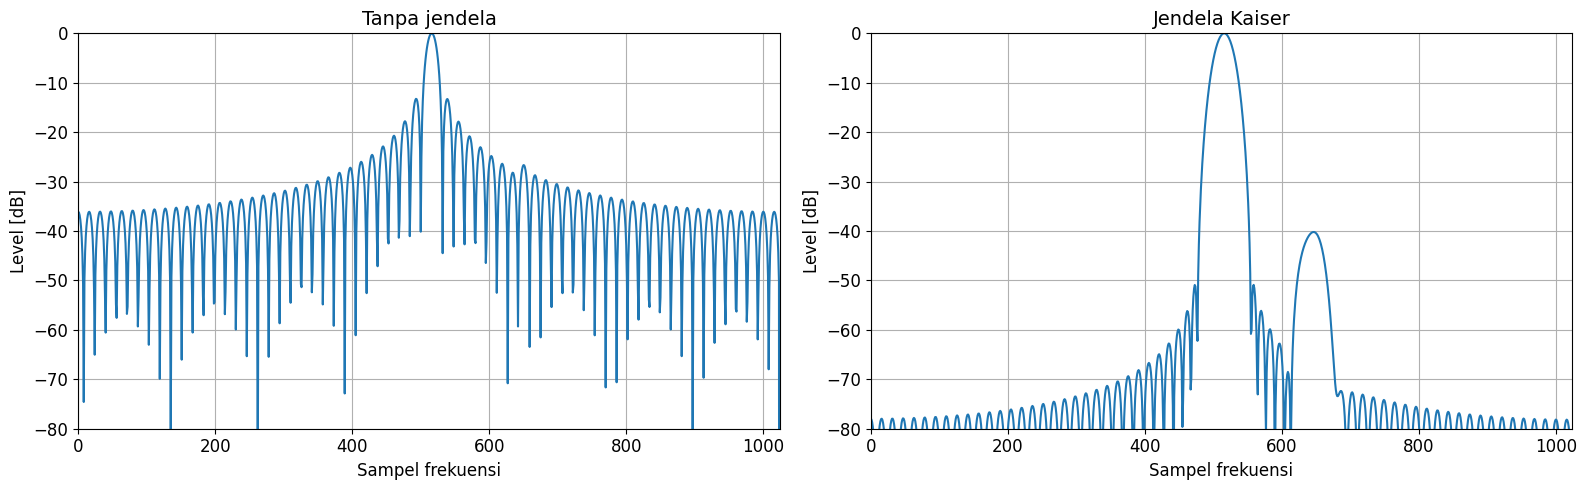

In [22]:
# Parameter masukan
N = 128
NFFT = 2048

# Sinyal masukan (panjang: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = 100*np.cos(2*np.pi*32*tt)+np.cos(2*np.pi*40*tt)

# Jendela (Kaiser)
wn = sig.kaiser(N, beta=7)
yy = xx*wn

# Hitung FFT 1
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

# Hitung FFT 2
yft = np.abs(fft(yy, NFFT))
ylg = 20*np.log10(yft / np.max(yft))

lst_ffts = [slg, ylg]
lst_wins = ['Tanpa jendela', 'Jendela Kaiser']
plt.figure(figsize=(16, 5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(lst_wins[i])
    plt.xlabel('Sampel frekuensi')
    plt.ylabel('Level [dB]')
    plt.plot(lst_ffts[i])
    plt.xlim([0, NFFT//2])
    plt.ylim([-80, 0])
    plt.grid(True)
plt.tight_layout()

Gambar diatas menampilkan dua grafik yang membandingkan respons frekuensi dari dua metode pemrosesan sinyal yang berbeda, yaitu "Tanpa jendela" dan "Jendela Kaiser". Pada kedua grafik, sumbu horizontal menunjukkan sampel frekuensi, sedangkan sumbu vertikal menunjukkan level dalam satuan desibel (dB).

1. **Grafik Pertama - Tanpa jendela**: Grafik ini menunjukkan respons frekuensi dari sebuah sistem atau transformasi yang tidak menggunakan jendela. Terlihat banyak lonjakan dan lembah yang menunjukkan sebaran energi yang besar pada banyak frekuensi berbeda. Ini menunjukkan adanya kebocoran spektral, dimana energi dari frekuensi yang diinginkan 'bocor' ke frekuensi lain.

2. **Grafik Kedua - Jendela Kaiser**: Grafik ini menggunakan teknik jendela Kaiser untuk proses transformasi. Jendela Kaiser adalah metode yang digunakan untuk mengurangi efek samping atau kebocoran spektral dengan memperlancar ujung-ujung dari frame sinyal sebelum transformasi. Hasilnya adalah puncak yang sangat tajam dan terlokalisasi dengan rendahnya level kebocoran kepada frekuensi lain (side lobes yang lebih rendah dan lebih terkontrol).

Secara umum, grafik menunjukkan bagaimana penggunaan jendela Kaiser dalam pemrosesan sinyal bisa menghasilkan hasil yang lebih bersih dan lebih fokus pada frekuensi yang diinginkan dibandingkan dengan metode tanpa jendela.